In [51]:
!pip install opencv-python Pillow boto3

In [52]:
import boto3
from PIL import Image
import io

# Set up the S3 client
s3 = boto3.client('s3')
bucket_name = 'ten-cars-crash-data'  # Replace with your bucket name
input_prefix = 'ten_crashbest_iamges/'  # Input folder path in S3
output_prefix = 'cars_crash_sagemaker_processed_images/'  # Output folder path in S3

# Initialize an empty list to store the generated S3 keys
image_keys = []

# Generate image keys based on the pattern C_000001_01.jpg to C_000010_50.jpg
for i in range(1, 11):  # Loop for C_000001 to C_000010
    for j in range(1, 51):  # Loop for _01 to _50
        # Format the image ID with leading zeros
        image_id = f"C_{i:06d}_{j:02d}.jpg"  # e.g., C_000001_01.jpg
        image_key = f"{input_prefix}{image_id}"  # Construct the full S3 key path
        image_keys.append(image_key)

# Confirm that the keys are generated correctly (optional)
print("Generated image keys:", image_keys)

# Process Each Image Using the Generated S3 Keys
for image_key in image_keys:
    print(f"Processing image: {image_key}")
    
    # Retrieve the image file from S3
    try:
        image_object = s3.get_object(Bucket=bucket_name, Key=image_key)
        image_content = image_object['Body'].read()

        # Load the image using PIL
        image = Image.open(io.BytesIO(image_content))
        
        # Example processing: Resize image (adjust as needed)
        processed_image = image.resize((128, 128))  # Resize to 128x128 pixels

        # Save processed image to a BytesIO object
        output_buffer = io.BytesIO()
        processed_image.save(output_buffer, format="JPEG")

        # Define the output key for processed images
        output_key = f"{output_prefix}{image_key.split('/')[-1]}"
        s3.put_object(Bucket=bucket_name, Key=output_key, Body=output_buffer.getvalue())
        
        print(f"Processed image saved to: {output_key}")
    
    except Exception as e:
        print(f"Error processing image {image_key}: {e}")


Generated image keys: ['ten_crashbest_iamges/C_000001_01.jpg', 'ten_crashbest_iamges/C_000001_02.jpg', 'ten_crashbest_iamges/C_000001_03.jpg', 'ten_crashbest_iamges/C_000001_04.jpg', 'ten_crashbest_iamges/C_000001_05.jpg', 'ten_crashbest_iamges/C_000001_06.jpg', 'ten_crashbest_iamges/C_000001_07.jpg', 'ten_crashbest_iamges/C_000001_08.jpg', 'ten_crashbest_iamges/C_000001_09.jpg', 'ten_crashbest_iamges/C_000001_10.jpg', 'ten_crashbest_iamges/C_000001_11.jpg', 'ten_crashbest_iamges/C_000001_12.jpg', 'ten_crashbest_iamges/C_000001_13.jpg', 'ten_crashbest_iamges/C_000001_14.jpg', 'ten_crashbest_iamges/C_000001_15.jpg', 'ten_crashbest_iamges/C_000001_16.jpg', 'ten_crashbest_iamges/C_000001_17.jpg', 'ten_crashbest_iamges/C_000001_18.jpg', 'ten_crashbest_iamges/C_000001_19.jpg', 'ten_crashbest_iamges/C_000001_20.jpg', 'ten_crashbest_iamges/C_000001_21.jpg', 'ten_crashbest_iamges/C_000001_22.jpg', 'ten_crashbest_iamges/C_000001_23.jpg', 'ten_crashbest_iamges/C_000001_24.jpg', 'ten_crashbest_ia

In [26]:
import boto3

s3 = boto3.client('s3')
bucket_name = 'ten-cars-crash-data'
input_prefix = 'ten_crashbest_iamges/'  # Make sure this matches your S3 path

# List all objects in the specified folder
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=input_prefix)
if 'Contents' in response:
    for obj in response['Contents']:
        print("Found:", obj['Key'])
else:
    print("No objects found in the specified folder.")

Found: ten_crashbest_iamges/C_000001_01.jpg
Found: ten_crashbest_iamges/C_000001_02.jpg
Found: ten_crashbest_iamges/C_000001_03.jpg
Found: ten_crashbest_iamges/C_000001_04.jpg
Found: ten_crashbest_iamges/C_000001_05.jpg
Found: ten_crashbest_iamges/C_000001_06.jpg
Found: ten_crashbest_iamges/C_000001_07.jpg
Found: ten_crashbest_iamges/C_000001_08.jpg
Found: ten_crashbest_iamges/C_000001_09.jpg
Found: ten_crashbest_iamges/C_000001_10.jpg
Found: ten_crashbest_iamges/C_000001_11.jpg
Found: ten_crashbest_iamges/C_000001_12.jpg
Found: ten_crashbest_iamges/C_000001_13.jpg
Found: ten_crashbest_iamges/C_000001_14.jpg
Found: ten_crashbest_iamges/C_000001_15.jpg
Found: ten_crashbest_iamges/C_000001_16.jpg
Found: ten_crashbest_iamges/C_000001_17.jpg
Found: ten_crashbest_iamges/C_000001_18.jpg
Found: ten_crashbest_iamges/C_000001_19.jpg
Found: ten_crashbest_iamges/C_000001_20.jpg
Found: ten_crashbest_iamges/C_000001_21.jpg
Found: ten_crashbest_iamges/C_000001_22.jpg
Found: ten_crashbest_iamges/C_00

INFO:matplotlib.font_manager:generated new fontManager
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


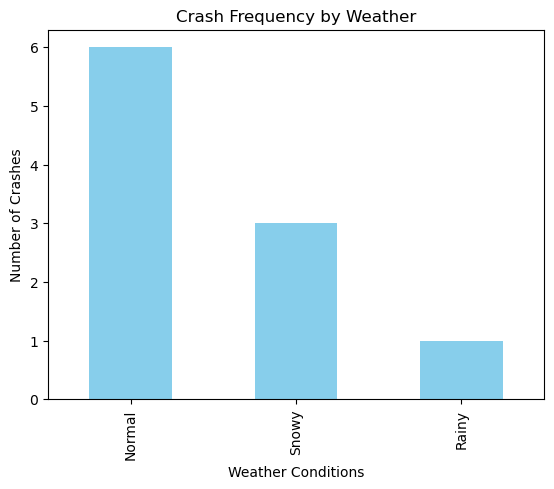

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_path = "s3://ten-cars-crash-data/ten-cars-crash-cleaned-data/part-00000-f01b94b4-07ad-4288-95c6-1ea3c24d6931-c000.snappy.parquet"
df = pd.read_parquet(data_path)

# Analysis
crash_by_weather = df['weather'].value_counts()

# Visualization
crash_by_weather.plot(kind='bar', color='skyblue')
plt.title("Crash Frequency by Weather")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Crashes")
plt.show()


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Feature engineering
X = df[['timing', 'weather', 'egoinvolve']]
y = df['crash_severity']  # Hypothetical column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


KeyError: 'crash_severity'